<a href="https://colab.research.google.com/github/juanepstein99/DI_Bootcamp/blob/main/Week10/Day4/DailyChallenge.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**NumPy, Pandas & Matplotlib Integration**

**Objective:**

Apply your knowledge of NumPy, Pandas, and Matplotlib to analyze a real-world dataset. Utilize advanced statistical functions and array operations in NumPy, and integrate these with Pandas for data manipulation and Matplotlib for visualization.

**Dataset:**

You will work with the “Global Power Plant Database” provided by the World Resources Institute, which contains detailed information about power plants worldwide. This dataset is ideal for practicing array manipulations, statistical analysis, and time series data handling.

**Tasks:**

**1. Data Import and Cleaning:**
* Import the dataset using Pandas.
* Identify missing values and handle them appropriately.
* Use NumPy to convert relevant columns to numerical types if necessary.

**2. Exploratory Data Analysis:**
* Utilize Pandas to summarize key statistics (mean, median, standard deviation) for numerical columns.
* Explore the distribution of power plants by country and fuel type.

**3. Statistical Analysis:**
* Perform a statistical analysis of power output by fuel type using NumPy's statistical functions.
* Use hypothesis testing to determine if the mean power output differs significantly between different fuel types.

**4. Time Series Analysis:**
* If the dataset includes time-related data (like year of establishment), use NumPy to analyze trends over time.
* Explore how the mix of fuel types for power generation has evolved over the years.

**5. Advanced Visualization:**
* Create visualizations using Matplotlib and Seaborn to illustrate your findings.
* Consider plotting the geographical distribution of power plants using latitude and longitude data, if available.

**6. Matrix Operations in Real-World Context:**
* Demonstrate matrix operations by analyzing relationships between different attributes (e.g., fuel type, capacity, and geographic location).
* Discuss the relevance of eigenvectors and eigenvalues in this context.

**7. Integrating NumPy with Pandas and Matplotlib:**
* Show how NumPy can be used to enhance data manipulation in Pandas and data visualization in Matplotlib.
* Provide examples, such as using NumPy arrays for complex filtering in Pandas or for creating sophisticated plots in Matplotlib.

In [10]:
# Imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set()

In [11]:
# 1. Data Import and Cleaning
df = pd.read_csv("global_power_plant_database.csv")

# Missing values overview
missing = df.isna().sum().sort_values(ascending=False)
print(missing.head(15))

# Duplicates removal
df = df.drop_duplicates()

# Strip text columns
for col in df.select_dtypes(include="object").columns:
    df[col] = df[col].astype(str).str.strip()

# Convert key columns to numeric
numeric_cols = ["capacity_mw", "latitude", "longitude", "commissioning_year"]

for c in numeric_cols:
    if c in df.columns:
        df[c] = pd.to_numeric(df[c], errors="coerce")

# Handle missing numeric values

# capacity_mw: drop if missing
if "capacity_mw" in df.columns:
    df = df.dropna(subset=["capacity_mw"])

/tmp/ipython-input-234/2480673706.py:2: DtypeWarning: Columns (10) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("global_power_plant_database.csv")


other_fuel3                      34844
other_fuel2                      34660
other_fuel1                      32992
generation_gwh_2013              28519
generation_gwh_2014              27710
generation_gwh_2015              26733
generation_gwh_2016              25792
generation_gwh_2017              25436
generation_gwh_2018              25299
generation_gwh_2019              25277
generation_data_source           23536
year_of_capacity_data            20049
estimated_generation_gwh_2013    18816
wepp_id                          18702
estimated_generation_gwh_2014    18433
dtype: int64


In [12]:
# 2. Exploratory Data Analysis:

# Numeric summary
num_df = df.select_dtypes(include=[np.number])
summary = num_df.agg(["count", "mean", "median", "std", "min", "max"]).T
summary.sort_values("count", ascending=False).head(15)

# Top countries by number of plants
if "country" in df.columns:
    country_counts = df["country"].value_counts().head(15)
    print(country_counts)

# Fuel type distribution
if "primary_fuel" in df.columns:
    fuel_counts = df["primary_fuel"].value_counts()
    print(fuel_counts.head(15))



country
USA    9833
CHN    4235
GBR    2751
BRA    2360
FRA    2155
IND    1589
DEU    1309
CAN    1159
ESP     829
RUS     545
JPN     522
AUS     486
PRT     469
CZE     462
ITA     396
Name: count, dtype: int64
primary_fuel
Solar             10665
Hydro              7156
Wind               5344
Gas                3998
Coal               2330
Oil                2320
Biomass            1430
Waste              1068
Nuclear             195
Geothermal          189
Storage             135
Other                43
Cogeneration         41
Petcoke              12
Wave and Tidal       10
Name: count, dtype: int64


In [13]:
# 3. Statistical Analysis:

# Group capacity by fuel type using NumPy stats
fuel_col = "primary_fuel"
cap_col = "capacity_mw"

fuel_stats = []
for fuel, g in df.groupby(fuel_col):
    x = g[cap_col].to_numpy()
    fuel_stats.append({
        "fuel": fuel,
        "n": len(x),
        "mean_mw": np.mean(x),
        "median_mw": np.median(x),
        "std_mw": np.std(x, ddof=1),
    })

fuel_stats_df = pd.DataFrame(fuel_stats).sort_values("mean_mw", ascending=False)
fuel_stats_df.head(10)

# Permutation test to compare means between two fuels
fuel_a = "Coal"
fuel_b = "Solar"

a = df.loc[df[fuel_col] == fuel_a, cap_col].dropna().to_numpy()
b = df.loc[df[fuel_col] == fuel_b, cap_col].dropna().to_numpy()

# Safety check
print(f"{fuel_a} n={len(a)}, {fuel_b} n={len(b)}")

obs_diff = np.mean(a) - np.mean(b)

combined = np.concatenate([a, b])
n_a = len(a)

np.random.seed(42)
n_perm = 5000
perm_diffs = np.empty(n_perm)

for i in range(n_perm):
    np.random.shuffle(combined)
    perm_a = combined[:n_a]
    perm_b = combined[n_a:]
    perm_diffs[i] = np.mean(perm_a) - np.mean(perm_b)

# Two-sided p-value
p_value = np.mean(np.abs(perm_diffs) >= np.abs(obs_diff))

print("Observed mean difference:", obs_diff)
print("Permutation p-value:", p_value)

Coal n=2330, Solar n=10665
Observed mean difference: 825.9227889149379
Permutation p-value: 0.0


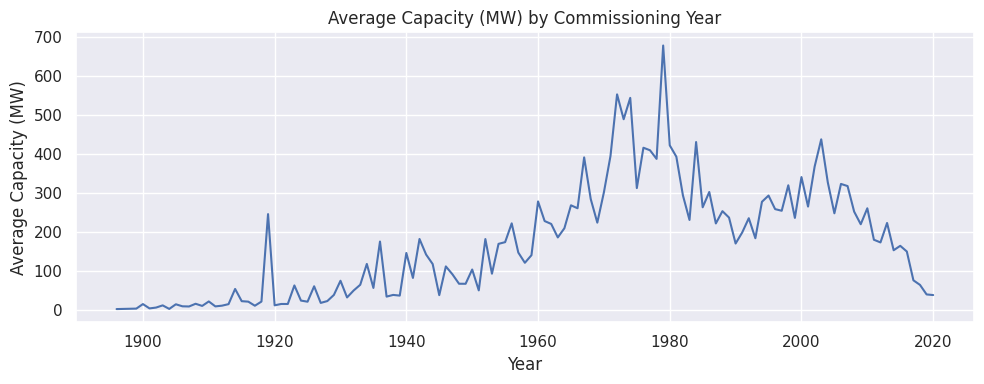

<Figure size 1200x500 with 0 Axes>

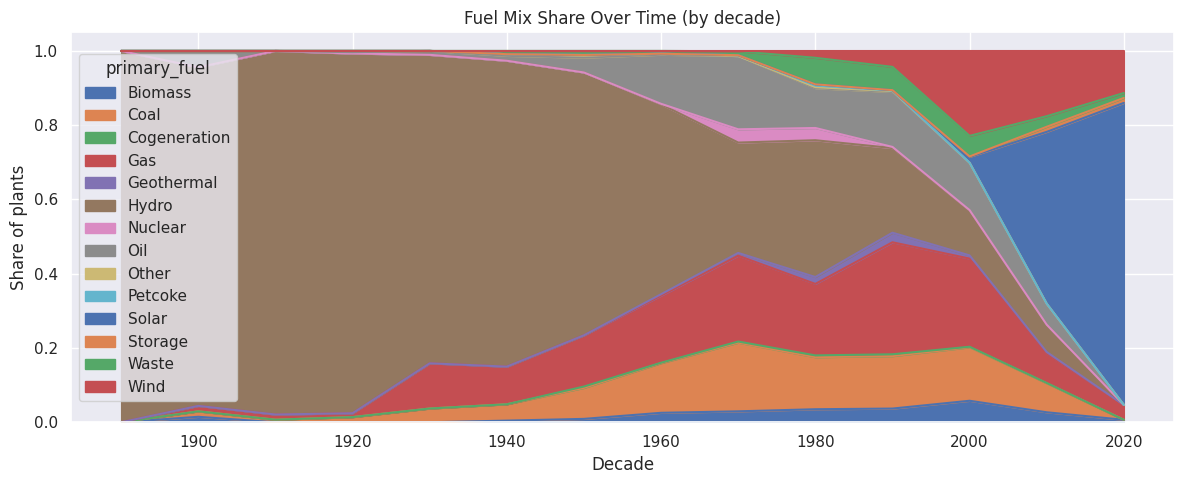

In [14]:
# 4. Time Series Analysis:

# Filter valid years
if "commissioning_year" in df.columns:
    df_year = df.dropna(subset=["commissioning_year"]).copy()
    df_year["commissioning_year"] = df_year["commissioning_year"].astype(int)

    yearly = df_year.groupby("commissioning_year")[cap_col].mean().sort_index()

    plt.figure(figsize=(10,4))
    plt.plot(yearly.index, yearly.values)
    plt.title("Average Capacity (MW) by Commissioning Year")
    plt.xlabel("Year")
    plt.ylabel("Average Capacity (MW)")
    plt.grid(True)
    plt.tight_layout()
    plt.show()

if "commissioning_year" in df.columns:
    df_year = df.dropna(subset=["commissioning_year"]).copy()
    df_year["commissioning_year"] = df_year["commissioning_year"].astype(int)

    # Create decade bucket
    df_year["decade"] = (df_year["commissioning_year"] // 10) * 10

    mix = (
        df_year.groupby(["decade", fuel_col])
        .size()
        .reset_index(name="count")
    )

    # Normalize to shares per decade
    mix["share"] = mix["count"] / mix.groupby("decade")["count"].transform("sum")

    pivot_mix = mix.pivot(index="decade", columns=fuel_col, values="share").fillna(0)

    plt.figure(figsize=(12,5))
    pivot_mix.plot(kind="area", stacked=True, figsize=(12,5))
    plt.title("Fuel Mix Share Over Time (by decade)")
    plt.xlabel("Decade")
    plt.ylabel("Share of plants")
    plt.tight_layout()
    plt.show()

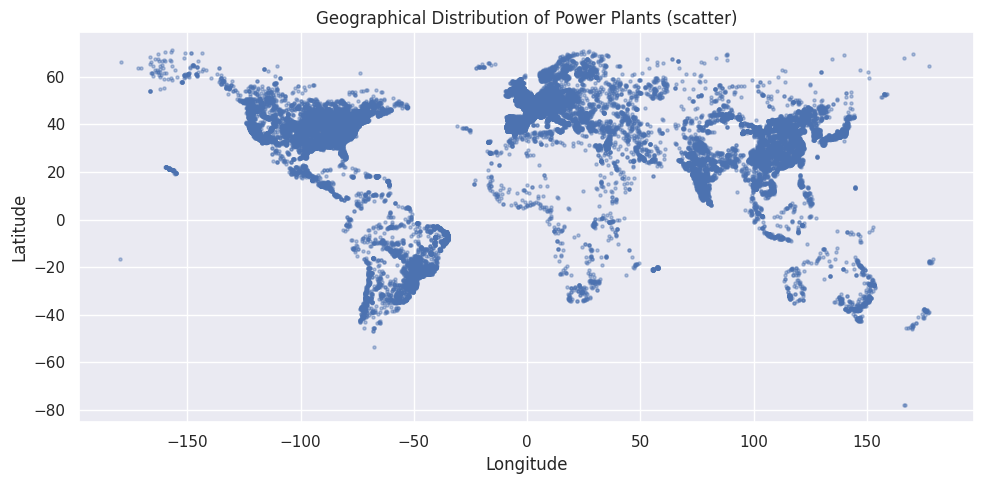

In [15]:
# 5. Advanced Visualization:

if "latitude" in df.columns and "longitude" in df.columns:
    geo = df.dropna(subset=["latitude", "longitude"]).copy()

    plt.figure(figsize=(10,5))
    plt.scatter(geo["longitude"], geo["latitude"], s=5, alpha=0.4)
    plt.title("Geographical Distribution of Power Plants (scatter)")
    plt.xlabel("Longitude")
    plt.ylabel("Latitude")
    plt.tight_layout()
    plt.show()

In [16]:
# 6. Matrix Operations in Real-World Context:

# Numeric feature matrix for matrix operations
features = [c for c in ["capacity_mw", "latitude", "longitude", "commissioning_year"] if c in df.columns]
M = df[features].dropna().to_numpy()

# Standardize (mean 0, std 1) to make features comparable
M_std = (M - M.mean(axis=0)) / M.std(axis=0, ddof=1)

# Correlation matrix
C = np.corrcoef(M_std, rowvar=False)

print("Features:", features)
print("Correlation matrix shape:", C.shape)

# Eigen decomposition of correlation matrix
eigvals, eigvecs = np.linalg.eig(C)

# Sort by explained magnitude
idx = np.argsort(eigvals)[::-1]
eigvals = eigvals[idx]
eigvecs = eigvecs[:, idx]

print("Eigenvalues:", eigvals)
print("Top eigenvector (direction of most variance):", eigvecs[:, 0])

Features: ['capacity_mw', 'latitude', 'longitude', 'commissioning_year']
Correlation matrix shape: (4, 4)
Eigenvalues: [1.35265608 1.15331281 0.85724805 0.63678306]
Top eigenvector (direction of most variance): [ 0.67787111 -0.19371531  0.70914027  0.0092319 ]


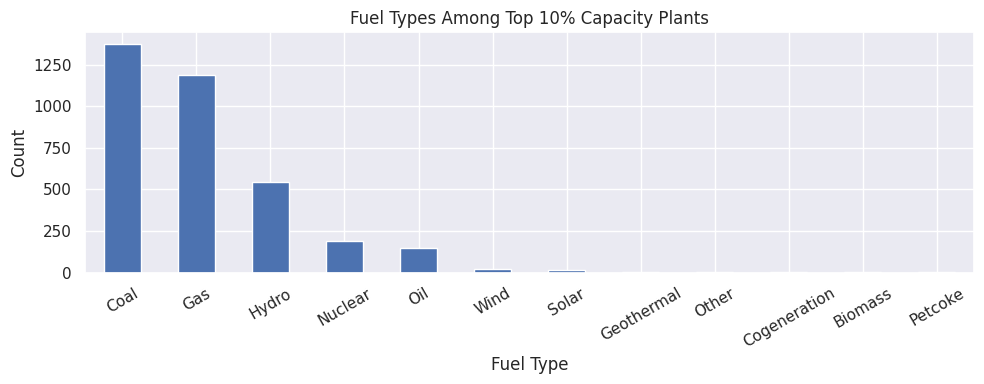

In [17]:
#7. Integrating NumPy with Pandas and Matplotlib:

# Filter plants with capacity above the 90th percentile (NumPy) and plot by fuel
p90 = np.percentile(df[cap_col].to_numpy(), 90)

mask = df[cap_col].to_numpy() >= p90
df_top = df.loc[mask]

top_by_fuel = df_top[fuel_col].value_counts()

plt.figure(figsize=(10,4))
top_by_fuel.plot(kind="bar")
plt.title("Fuel Types Among Top 10% Capacity Plants")
plt.xlabel("Fuel Type")
plt.ylabel("Count")
plt.xticks(rotation=30)
plt.tight_layout()
plt.show()

**Summary**

I cleaned and explored the Global Power Plant dataset using Pandas and NumPy.  
I analyzed plant capacity by fuel type and compared averages using a permutation test.  
I studied trends over time using the commissioning year.  
Finally, I created visualizations and used basic matrix operations to understand relationships between variables.